In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import RepeatedKFold, train_test_split, GridSearchCV
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = "h1n1_vaccine_prediction.csv"

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [3]:
train_df = pd.read_csv(PATH)
train_df_labels = pd.read_csv(PATH)
test_df = pd.read_csv(PATH, index_col='unique_id')

In [4]:
train_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
train_df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [6]:
train_df_labels.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
test_df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
merged_train_df = train_df.merge(train_df_labels, how='inner', on='unique_id')

In [9]:
train_df.shape

(26707, 34)

In [10]:
test_df.shape[0]

26707

In [11]:
merged_train_df.shape

(26707, 67)

In [12]:
both_vax_ratio = train_df[(train_df['h1n1_vaccine']==1)].shape[0]
either_vax_ratio = train_df[(train_df['h1n1_vaccine']==1)].shape[0]
total_responses = train_df.shape[0]
percentage_both_vax = both_vax_ratio / total_responses * 100
rounded_percentage_both_vax = round(percentage_both_vax, 2)
print("Percentage of respondents who received vaccines: {:.2f}%".format(rounded_percentage_both_vax))

Percentage of respondents who received vaccines: 21.25%


In [13]:
print(train_df['h1n1_vaccine'].value_counts())

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64


In [14]:
all_cols = merged_train_df.columns.tolist()

opinion_cols = []
for col in merged_train_df.columns.tolist():
    if col.startswith("opinion"):
        opinion_cols.append(col)

In [15]:
binary_cols = []
for col in merged_train_df.columns.tolist():
    if merged_train_df[col].nunique() <= 2:
        binary_cols.append(col)

In [34]:
no_of_cols = []
for col in merged_train_df.columns.tolist():
    if col.startswith("no_of"):
        no_of_cols.append(col)

In [35]:
def make_stacked_chart(df, col, vaccine):
    df_grouped = pd.DataFrame(df.groupby(col)[vaccine].value_counts())
    df_grouped.columns = ['count']
    df_grouped = df_grouped.reset_index()
    
    pivot_df = df_grouped.pivot(index=[col], columns=vaccine, values=['count']).reset_index()
    
    pivot_df.set_index(col).plot(kind='bar', stacked=True, color=['steelblue', 'darkorange'])
    plt.title(f'Stacked Bar Chart {col}')
    plt.legend(['Non-vaccinated', 'Vaccinated'])
    plt.ylabel('Count')
    plt.show()
    
def make_group_barcharts(df, col_list, nrows, ncols, vaccine, tight=False, figx=16, figy=36):
    fig = plt.figure(figsize=(figx, figy))

    for i, col in enumerate(col_list):
        ax = plt.subplot(nrows, ncols, i+1)
        df_grouped = pd.DataFrame(df.groupby(col)[vaccine].value_counts())
        df_grouped.columns = ['count']
        df_grouped = df_grouped.reset_index()
    
        pivot_df = df_grouped.pivot(index=[col], columns=vaccine, values=['count']).reset_index()
    
        pivot_df.set_index(col).plot(kind='bar', stacked=True, color=['steelblue', 'darkorange'], ax = ax)
        plt.title(f'Stacked Bar Chart {col}')
        plt.legend(['Non-vaccinated', 'Vaccinated'])
        plt.ylabel('Count')
        
    if tight:
        plt.tight_layout()

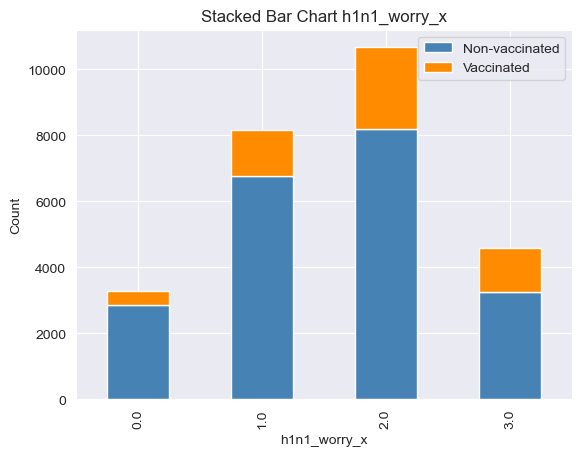

In [36]:
make_stacked_chart(merged_train_df, 'h1n1_worry_x', vaccine='h1n1_vaccine_x')

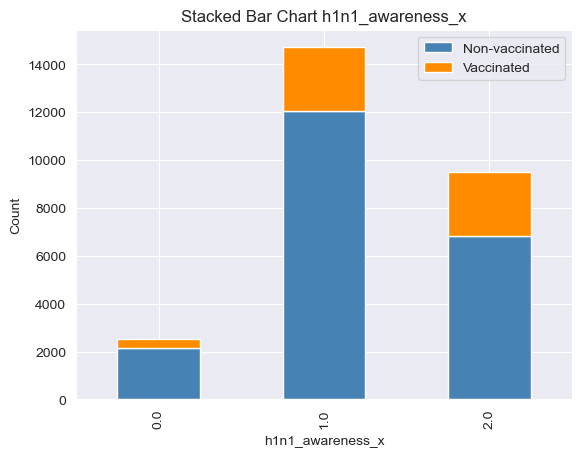

In [37]:
make_stacked_chart(merged_train_df, 'h1n1_awareness_x', vaccine='h1n1_vaccine_x')

ValueError: num must be an integer with 1 <= num <= 2, not 3

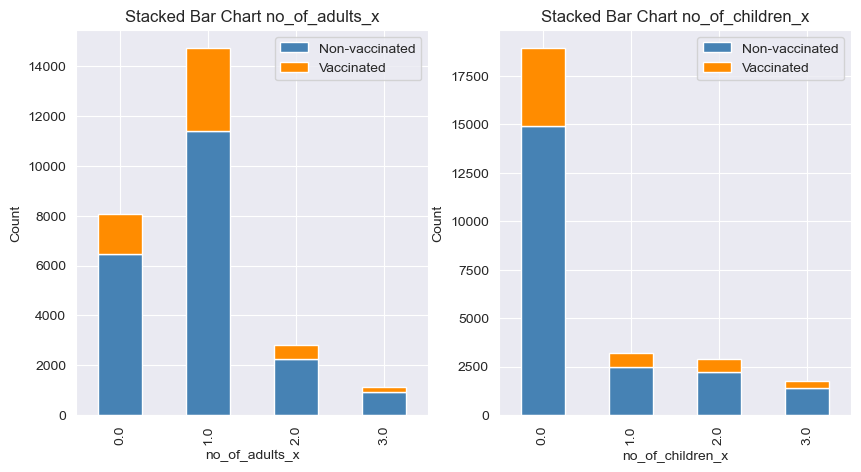

In [42]:
make_group_barcharts(merged_train_df, no_of_cols, nrows=1, ncols=2, vaccine='h1n1_vaccine_x',figx=10, figy=5)

In [43]:
train_df.age_bracket.value_counts().index

Index(['65+ Years', '55 - 64 Years', '45 - 54 Years', '18 - 34 Years',
       '35 - 44 Years'],
      dtype='object', name='age_bracket')

In [44]:
print(merged_train_df.columns)

Index(['unique_id', 'h1n1_worry_x', 'h1n1_awareness_x',
       'antiviral_medication_x', 'contact_avoidance_x', 'bought_face_mask_x',
       'wash_hands_frequently_x', 'avoid_large_gatherings_x',
       'reduced_outside_home_cont_x', 'avoid_touch_face_x',
       'dr_recc_h1n1_vacc_x', 'dr_recc_seasonal_vacc_x',
       'chronic_medic_condition_x', 'cont_child_undr_6_mnths_x',
       'is_health_worker_x', 'has_health_insur_x', 'is_h1n1_vacc_effective_x',
       'is_h1n1_risky_x', 'sick_from_h1n1_vacc_x', 'is_seas_vacc_effective_x',
       'is_seas_risky_x', 'sick_from_seas_vacc_x', 'age_bracket_x',
       'qualification_x', 'race_x', 'sex_x', 'income_level_x',
       'marital_status_x', 'housing_status_x', 'employment_x', 'census_msa_x',
       'no_of_adults_x', 'no_of_children_x', 'h1n1_vaccine_x', 'h1n1_worry_y',
       'h1n1_awareness_y', 'antiviral_medication_y', 'contact_avoidance_y',
       'bought_face_mask_y', 'wash_hands_frequently_y',
       'avoid_large_gatherings_y', 'reduced

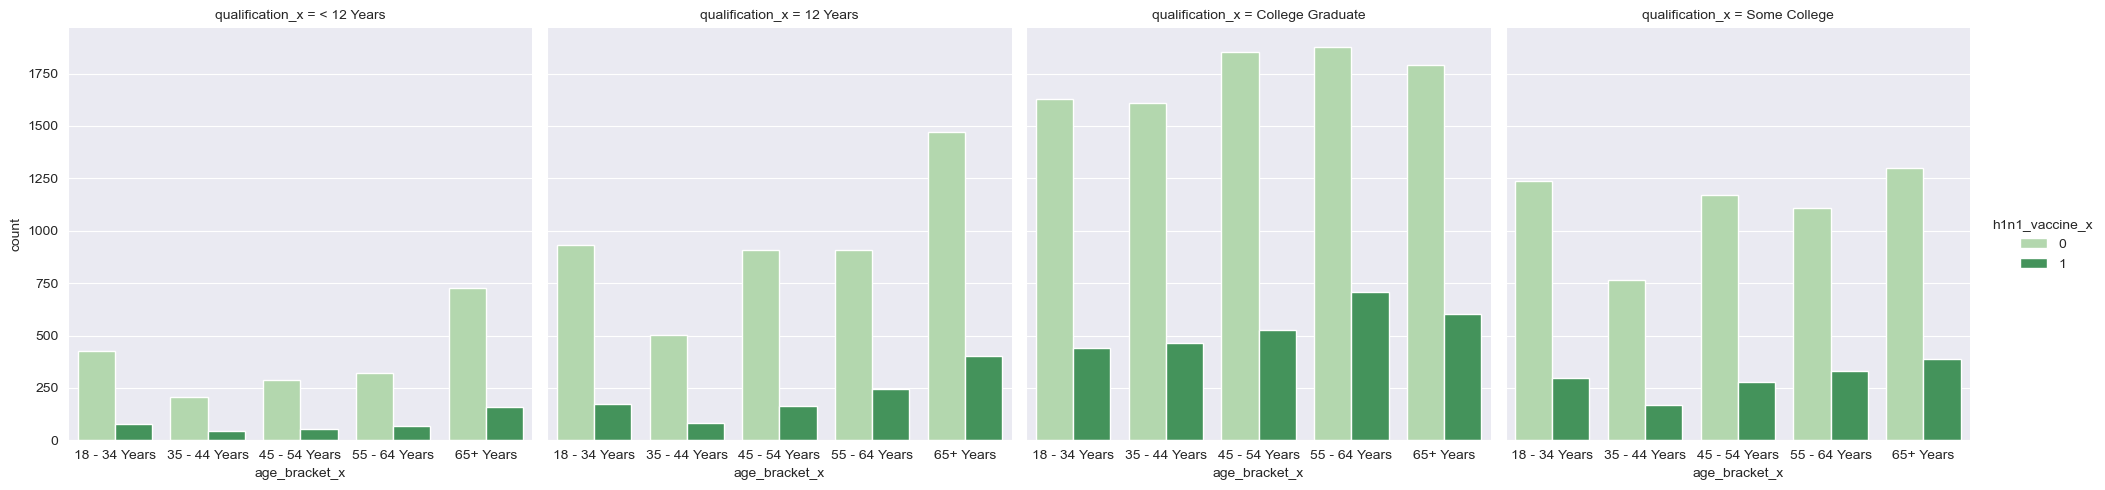

In [45]:
g = sns.catplot(x="age_bracket_x", col="qualification_x",hue='h1n1_vaccine_x',
                data=merged_train_df,
                kind="count", palette='Greens', order=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
                )

In [46]:
merged_train_df['income_level_x'] = merged_train_df['income_level_x'].map({'<= $75,000, Above Poverty':'<=75000 Above Poverty', '> $75,000':'>75000', 'Below Poverty':'Below Poverty'})

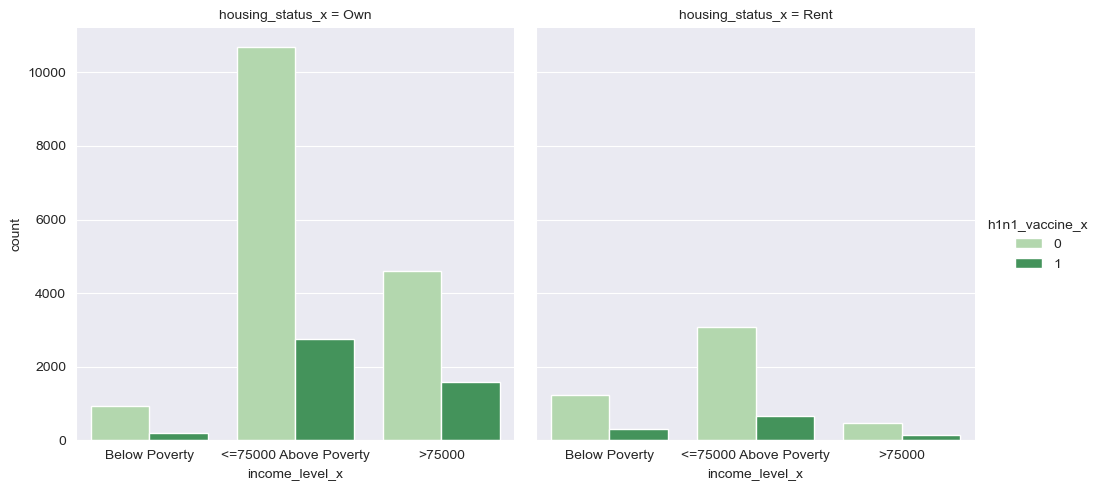

In [47]:
g = sns.catplot(x="income_level_x", col="housing_status_x",hue='h1n1_vaccine_x',
                data=merged_train_df,
                kind="count", palette='Greens'
                )
g.figure.subplots_adjust(wspace=.05, hspace=.02)

In [68]:
merged_train_df.isnull().sum().sort_values(ascending=False)

has_health_insur_x             12274
has_health_insur_y             12274
income_level_y                  4423
dr_recc_seasonal_vacc_y         2160
dr_recc_h1n1_vacc_y             2160
dr_recc_seasonal_vacc_x         2160
housing_status_y                2042
employment_y                    1463
marital_status_y                1408
qualification_y                 1407
chronic_medic_condition_y        971
cont_child_undr_6_mnths_y        820
is_health_worker_y               804
sick_from_seas_vacc_y            537
sick_from_seas_vacc_x            537
is_seas_risky_x                  514
is_seas_risky_y                  514
is_seas_vacc_effective_x         462
is_seas_vacc_effective_y         462
sick_from_h1n1_vacc_y            395
is_h1n1_vacc_effective_y         391
is_h1n1_risky_y                  388
no_of_adults_y                   249
no_of_children_y                 249
contact_avoidance_y              208
avoid_touch_face_y               128
h1n1_awareness_y                 116
h

In [69]:
freq_cols = ['income_level_x','dr_recc_h1n1_vacc_x','housing_status_x','employment_x','marital_status_x','qualification_x','chronic_medic_condition_x',
             'cont_child_undr_6_mnths_x','is_health_worker_x','sick_from_h1n1_vacc_x','is_h1n1_vacc_effective_x',
             'is_h1n1_risky_x','no_of_children_x','no_of_adults_x','contact_avoidance_x','avoid_touch_face_x','h1n1_awareness_x',
             'h1n1_worry_x','avoid_large_gatherings_x','reduced_outside_home_cont_x','antiviral_medication_x',
             'wash_hands_frequently_x','bought_face_mask_x']

In [75]:
merged_train_df['marital_status_x'].value_counts()

marital_status_x
Married        14963
Not Married    11744
Name: count, dtype: int64

In [65]:
train_df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                26707
race                             0
sex                              0
income_level                 26707
marital_status               26707
housing_status      

In [66]:
train_df['income_level'] = train_df['income_level'].map({'Below Poverty':1, '<=75000 Above Poverty':2, '>75000':3}) 
train_df['qualification'] = train_df['qualification'].map({'< 12 Years':1, '12 Years':2, 'Some College':3, 'College Graduate':4}) 
train_df['housing_status'] = train_df['housing_status'].map({'Rent':0, 'Own':1}) 
train_df['marital_status'] = train_df['marital_status'].map({'Not Married':0, 'Married':1}) 
train_df['employment'] = train_df['employment'].map({'Unemployed':1, 'Not in Labor Force':2, 'Employed':3})

In [67]:
for col in freq_cols:
    freq_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    temp = freq_imp.fit_transform(merged_train_df[[col]]).ravel()
    merged_train_df[col] = temp

In [77]:
temp = merged_train_df[['age_bracket_x', 'race_x', 'sex_x', 'census_msa_x']].copy()
for col in temp.columns.tolist():
    label_encoder = LabelEncoder()
    temp[col] = label_encoder.fit_transform(temp[col])
    
merged_train_df.drop(columns=['age_bracket_x', 'race_x', 'sex_x', 'census_msa_x'], inplace=True)
merged_train_df = pd.concat([temp, merged_train_df], axis=1)

merged_train_df.head()

,age_bracket_x,race_x,sex_x,census_msa_x,unique_id,h1n1_worry_x,h1n1_awareness_x,antiviral_medication_x,contact_avoidance_x,bought_face_mask_x,wash_hands_frequently_x,avoid_large_gatherings_x,reduced_outside_home_cont_x,avoid_touch_face_x,dr_recc_h1n1_vacc_x,dr_recc_seasonal_vacc_x,chronic_medic_condition_x,cont_child_undr_6_mnths_x,is_health_worker_x,has_health_insur_x,is_h1n1_vacc_effective_x,is_h1n1_risky_x,sick_from_h1n1_vacc_x,is_seas_vacc_effective_x,is_seas_risky_x,sick_from_seas_vacc_x,qualification_x,income_level_x,marital_status_x,housing_status_x,employment_x,no_of_adults_x,no_of_children_x,h1n1_vaccine_x,h1n1_worry_y,h1n1_awareness_y,antiviral_medication_y,contact_avoidance_y,bought_face_mask_y,wash_hands_frequently_y,avoid_large_gatherings_y,reduced_outside_home_cont_y,avoid_touch_face_y,dr_recc_h1n1_vacc_y,dr_recc_seasonal_vacc_y,chronic_medic_condition_y,cont_child_undr_6_mnths_y,is_health_worker_y,has_health_insur_y,is_h1n1_vacc_effective_y,is_h1n1_risky_y,sick_from_h1n1_vacc_y,is_seas_vacc_effective_y,is_seas_risky_y,sick_from_seas_vacc_y,age_bracket_y,qualification_y,race_y,sex_y,income_level_y,marital_status_y,housing_status_y,employment_y,census_msa_y,no_of_adults_y,no_of_children_y,h1n1_vaccine_y
0,3,3,0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,12 Years,Below Poverty,Not Married,Rent,Employed,0.0,0.0,0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,0,3,1,0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,College Graduate,<=75000 Above Poverty,Not Married,Own,Employed,2.0,0.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,4,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2,3,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,Some College,<=75000 Above Poverty,Married,Own,Employed,1.0,0.0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [78]:
merged_train_df.drop(columns='unique_id', inplace=True)

In [80]:
X = merged_train_df.loc[:26707].copy()
y = X['h1n1_vaccine_x'].copy()

X.pop('h1n1_vaccine_x')

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine_x, Length: 26707, dtype: int64

In [82]:
X.fillna(-1, inplace=True)
for col in X.columns:
    X[col], _ = X[col].factorize()
    X[col] = X[col].astype(int)

In [83]:
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()
    
for col in X.columns:
    X[col] = X[col].astype(int)

discrete_features = X.dtypes == int

In [84]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, n_neighbors=10)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

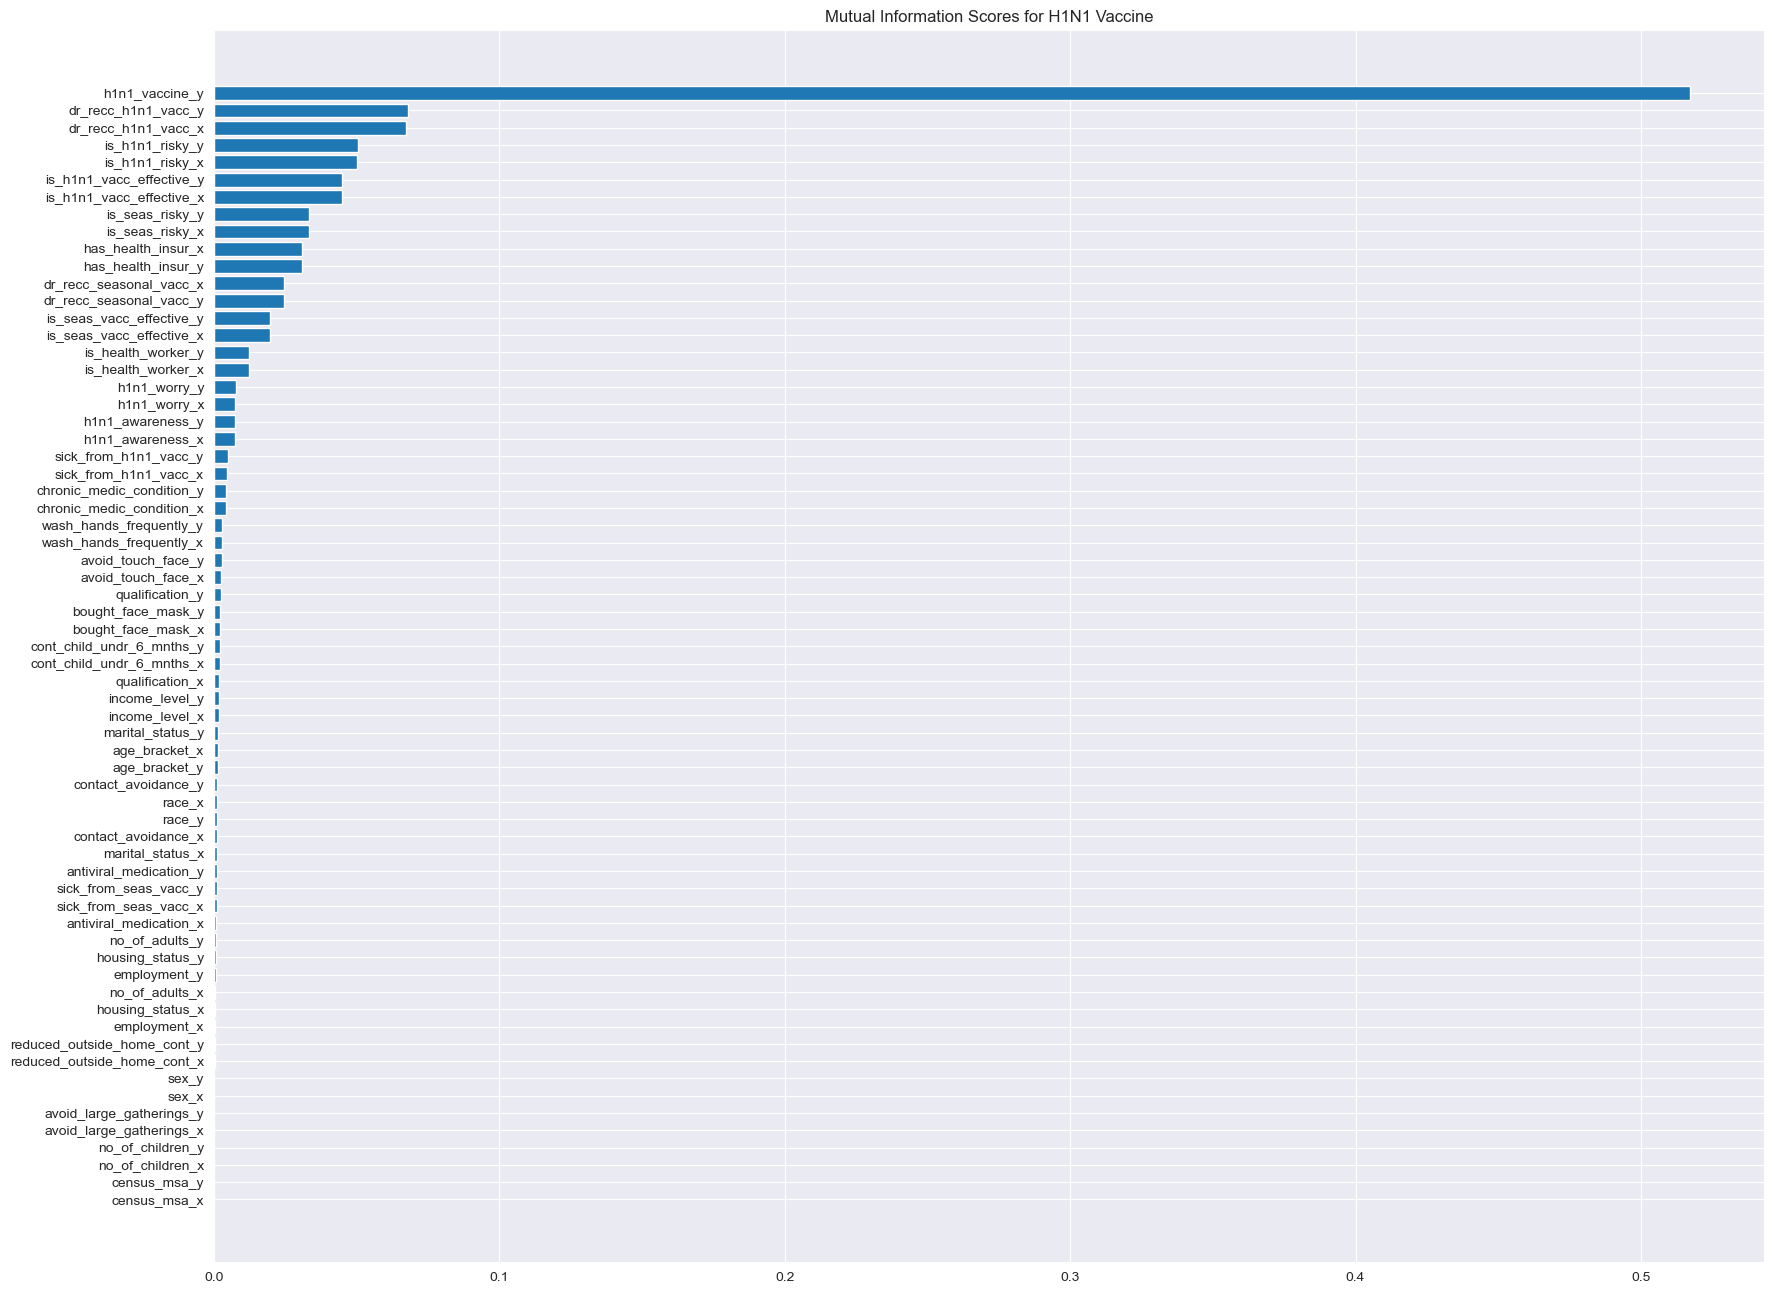

In [85]:
plt.figure(figsize=(20, 16))

mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores for H1N1 Vaccine")
plt.show()